<a href="https://colab.research.google.com/github/Pratik94229/Time-Series/blob/main/Airline_Passenger_Prediction_using_FBProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
#Data handling and manipulation
import pandas as pd
import numpy as np

#For time series analysis
import io, os, sys, setuptools, tokenize
from prophet import Prophet


In [22]:
#Downloading dataset
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv


--2023-05-11 10:16:45--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv.1’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2023-05-11 10:16:45 (36.5 MB/s) - ‘airline-passengers.csv.1’ saved [2180/2180]



In [23]:
df = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True)


In [24]:
df.head(3)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [25]:
from prophet.plot import add_changepoints_to_plot

In [26]:
df.columns=['y']

In [27]:
df['ds']=df.index

In [28]:
df.head(3)

,y,ds
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01


In [29]:
df.tail()

,y,ds
Month,,
1960-08-01,606,1960-08-01
1960-09-01,508,1960-09-01
1960-10-01,461,1960-10-01
1960-11-01,390,1960-11-01
1960-12-01,432,1960-12-01


In [30]:
m=Prophet()

In [31]:
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d3g1wre/v0016n0m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d3g1wre/id4x3f5s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74975', 'data', 'file=/tmp/tmp5d3g1wre/v0016n0m.json', 'init=/tmp/tmp5d3g1wre/id4x3f5s.json', 'output', 'file=/tmp/tmp5d3g1wre/prophet_model2zdwkohn/prophet_model-20230511101645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:16:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:16:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [32]:
#Creating future dates for prediction
future = m.make_future_dataframe(periods=12,freq="MS")
     

In [33]:
future.tail()

,ds
151,1961-08-01
152,1961-09-01
153,1961-10-01
154,1961-11-01
155,1961-12-01


In [34]:
forecast=m.predict(future)

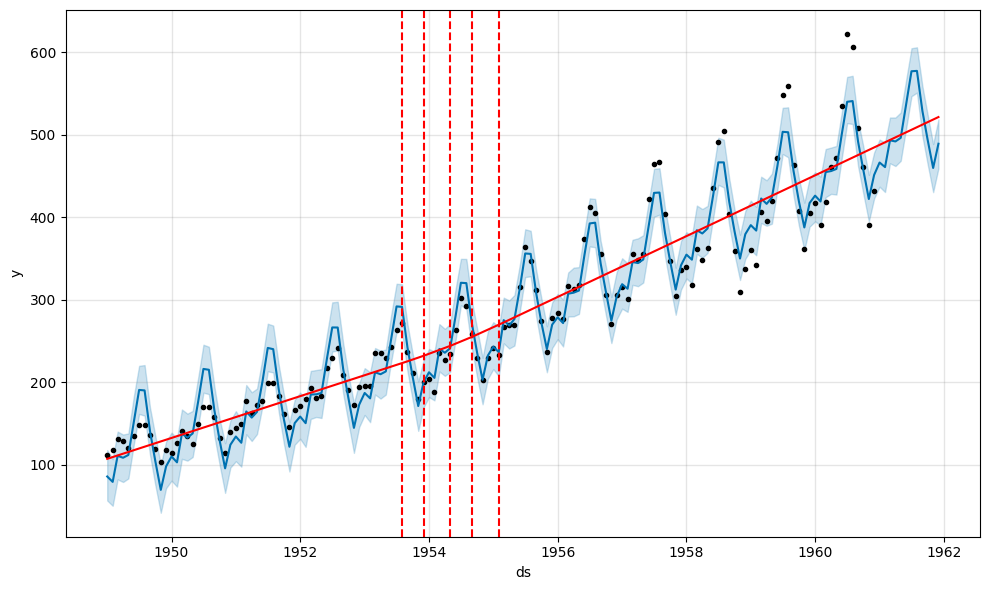

In [36]:
fig=m.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m,forecast)

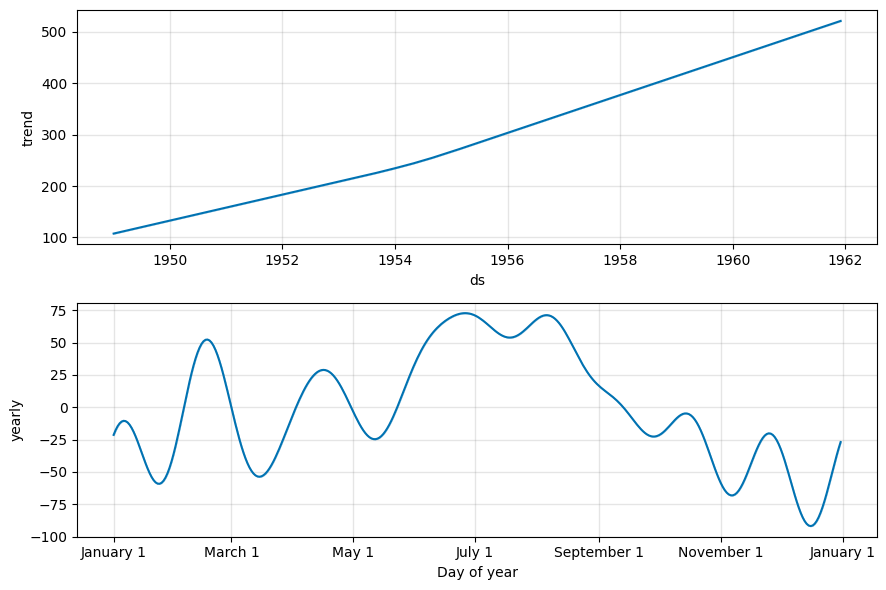

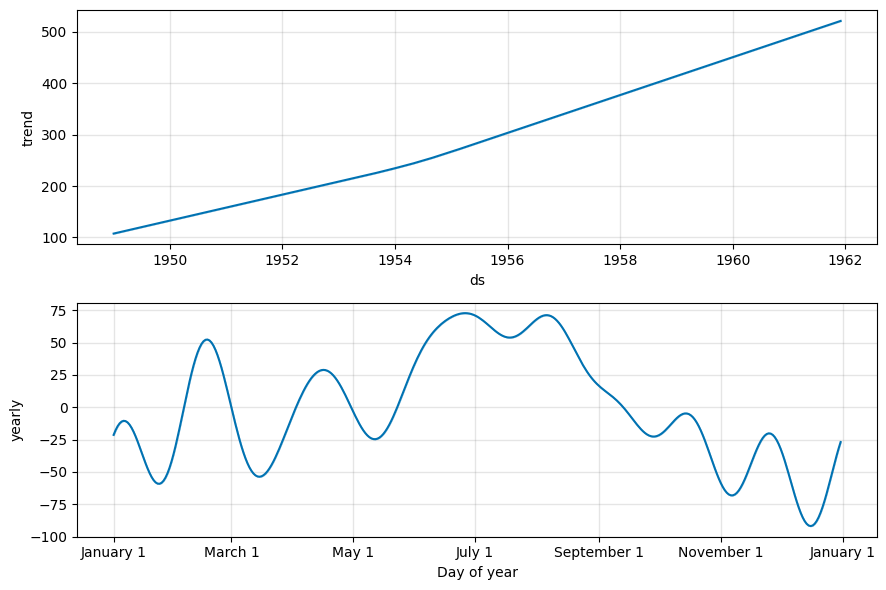

In [37]:
m.plot_components(forecast)

In [38]:
m1=Prophet(seasonality_mode='multiplicative')

In [39]:
m1.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d3g1wre/5l_my7fa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d3g1wre/7q3yl0dr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66892', 'data', 'file=/tmp/tmp5d3g1wre/5l_my7fa.json', 'init=/tmp/tmp5d3g1wre/7q3yl0dr.json', 'output', 'file=/tmp/tmp5d3g1wre/prophet_modeltxw3_z5q/prophet_model-20230511102457.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:24:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:24:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [40]:
#Creating future dates for prediction
future1 = m1.make_future_dataframe(periods=12,freq="MS")
     

In [43]:
forecast1=m1.predict(future1)

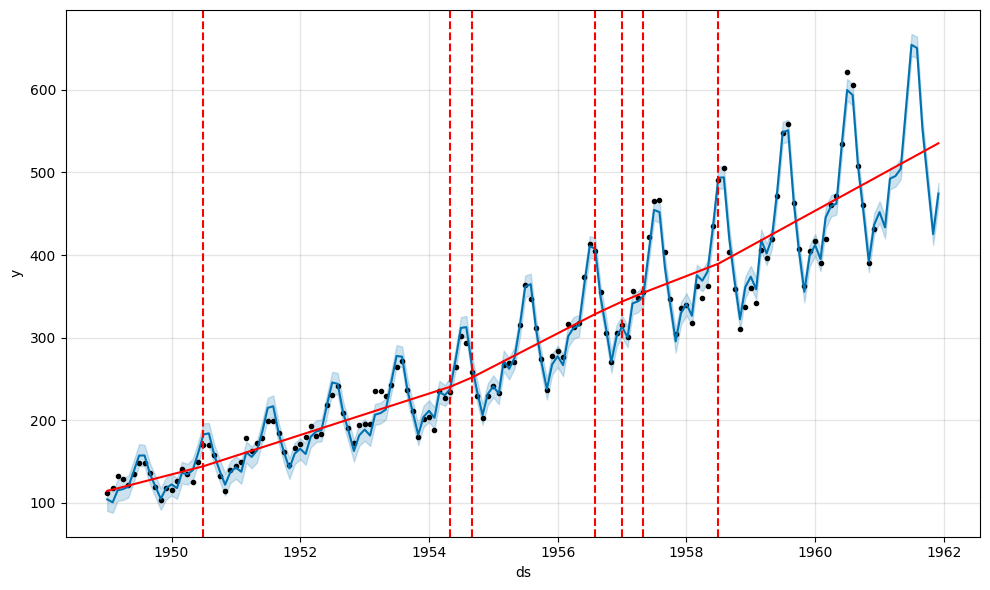

In [44]:
fig=m.plot(forecast1)
a=add_changepoints_to_plot(fig.gca(),m1,forecast1)

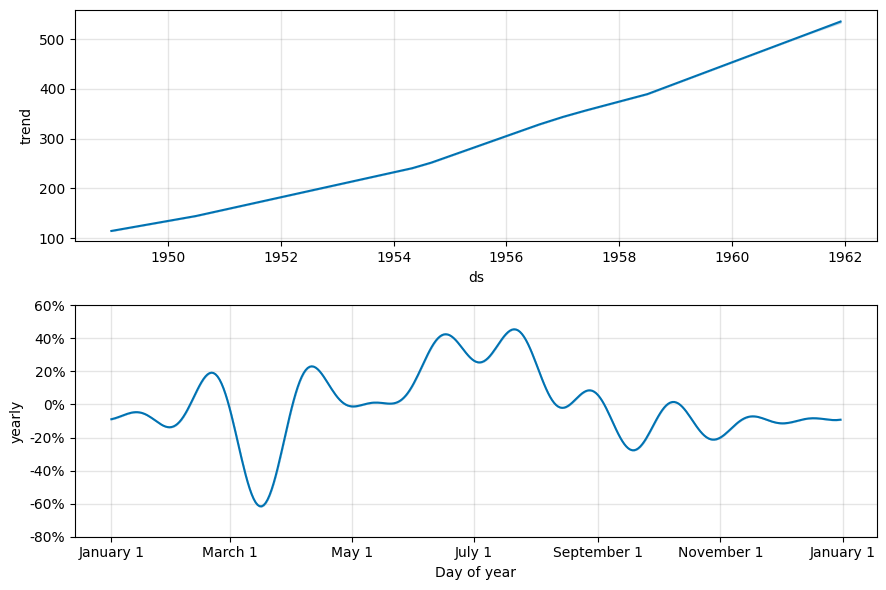

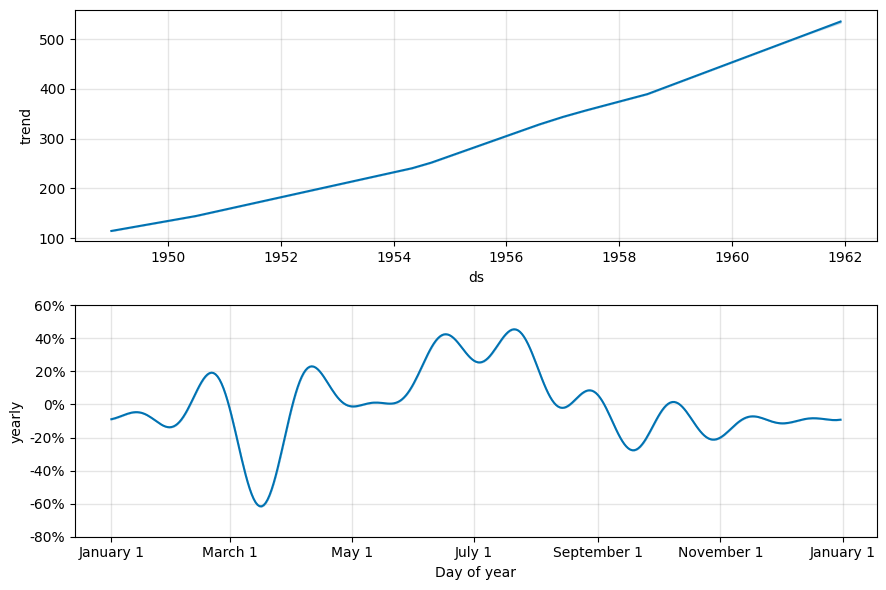

In [45]:
m1.plot_components(forecast1)

In [46]:
logdf=df.copy()

In [49]:
logdf['y']=np.log(logdf['y'])

In [56]:
m2=Prophet()

In [57]:
m2.fit(logdf)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d3g1wre/uxcmq699.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5d3g1wre/oed0umep.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67145', 'data', 'file=/tmp/tmp5d3g1wre/uxcmq699.json', 'init=/tmp/tmp5d3g1wre/oed0umep.json', 'output', 'file=/tmp/tmp5d3g1wre/prophet_model4lzi00g1/prophet_model-20230511103914.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:39:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:39:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [58]:
#Creating future dates for prediction
future = m2.make_future_dataframe(periods=12,freq="MS")
     

In [59]:
forecast=m2.predict(future)

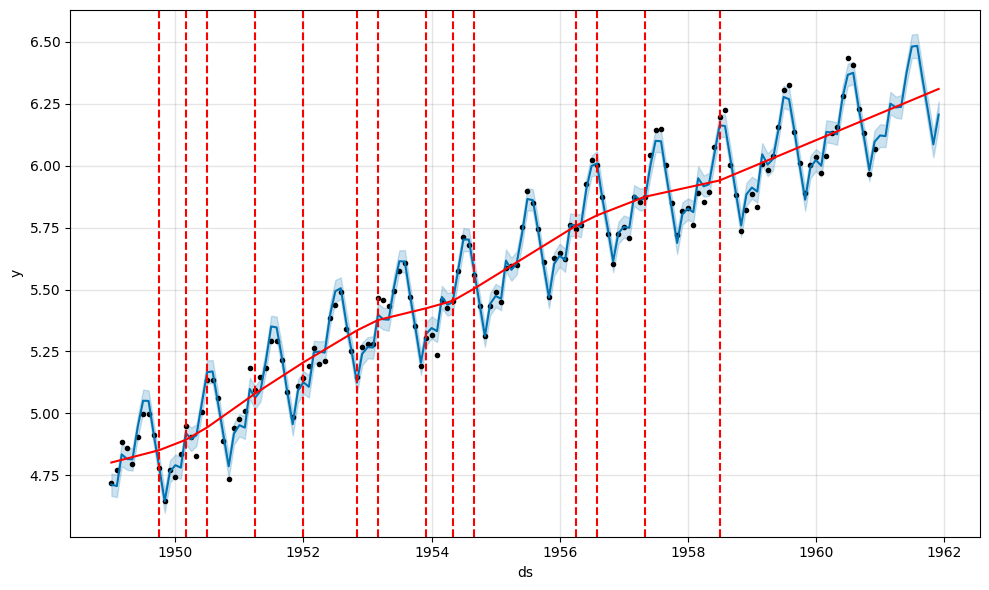

In [60]:
fig=m2.plot(forecast)
a=add_changepoints_to_plot(fig.gca(),m2,forecast)

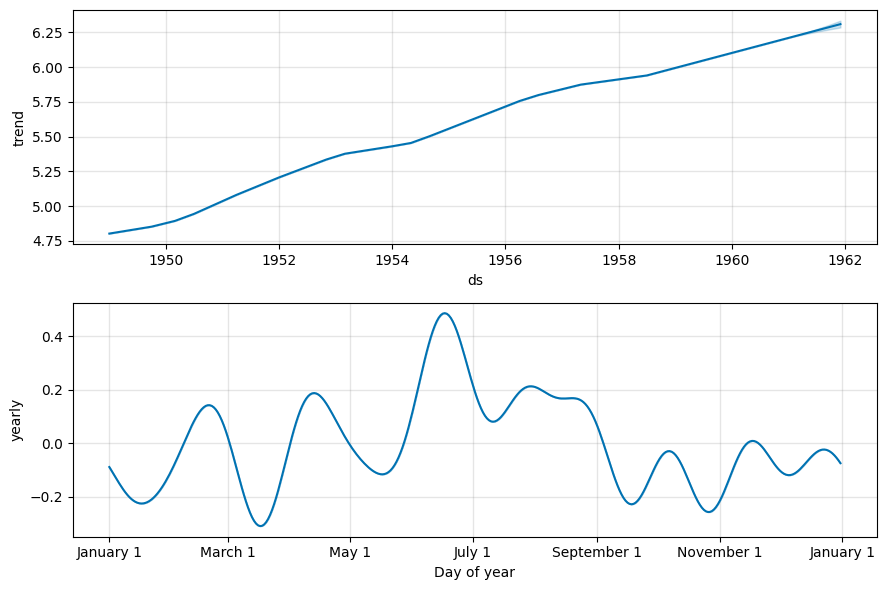

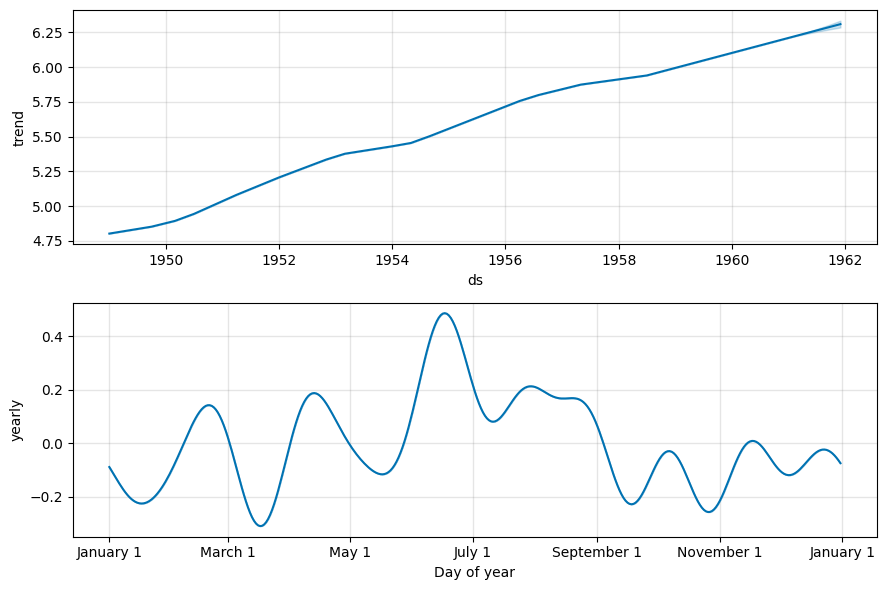

In [62]:
m2.plot_components(forecast)